## AIM - This is the data of an online retailing company where they are trying to find which online shopper will generate revenue by his/her online shoppers’ activity on their site

### Project Done by - Dinesh Sonawane

In [547]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

import warnings
warnings.filterwarnings('ignore')

In [548]:
# Read the original dataset
original_df = pd.read_csv('online_shoppers_intention (1).csv')
original_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [549]:
original_df.shape

(12330, 18)

In [550]:
original_df.info()
# Observations - 
# 1. There are no null values present in the dataset
# 2. Except Month, weekend and revenue columns, all other are numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

In [551]:
original_df.duplicated().sum()

125

In [552]:
original_df[original_df.duplicated()]
# Observations - 
# 1. There is a possibility that multiple users visiting the same page at same time having same properties 
#    such as bounce rates, exit rates etc.
# 2. We should not neglect such users having same behaviour

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [553]:
original_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Below are few of the questions that can be answered by deep diving into given data
- Which month has maximum number of visitors and how many of them are helping to generate revenue?
- Is there any relationship between Special day probability in particular month to number of converted visitors?
- Is there any relationship between specific region in terms of generating revenue?

In [554]:
# Which month has maximum number of visitors and how many of them are helping to generate revenue?

In [555]:
monthly_visitors_count = original_df.groupby('Month')['Administrative'].count()

In [556]:
monthly_visitors_count

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: Administrative, dtype: int64

In [557]:
monthly_visitors_count = monthly_visitors_count.sort_values(ascending = False)

In [558]:
monthly_visitors_count

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Administrative, dtype: int64

In [559]:
monthly_visitors_count_df = pd.DataFrame(monthly_visitors_count)

In [560]:
monthly_visitors_count_df.rename(columns={'Administrative':'Monthly Visitors'}, inplace=True)

In [561]:
monthly_visitors_count_df

,Monthly Visitors
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288


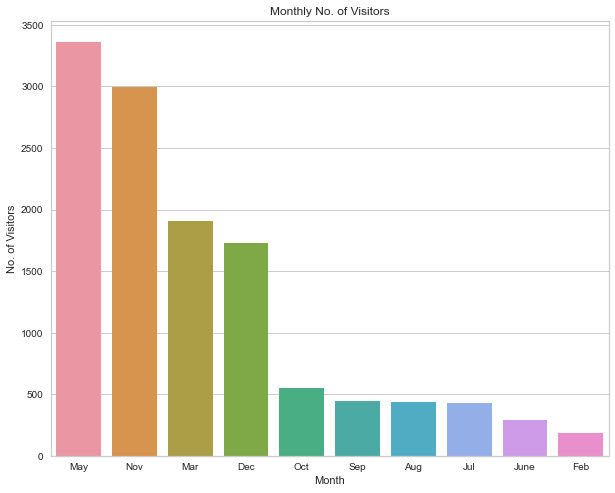

In [562]:
plt.figure(figsize = (10,8))
sns.barplot(x = monthly_visitors_count.index, y = monthly_visitors_count.values)
plt.xlabel('Month')
plt.ylabel('No. of Visitors')
plt.title('Monthly No. of Visitors')
plt.show()

In [563]:
# Observations - 
# May month has the maximum no. of visitors followed by Nov and Mar
# Let's explore if May month has max. prbability of special days

In [564]:
data_month_special_day = original_df[['SpecialDay (probability)','Month']]
data_nonzero_special_day = data[data['SpecialDay (probability)']!=0]
data_nonzero_special_day['Month'].unique()

array(['Feb', 'May'], dtype=object)

In [565]:
data_nonzero_special_day_motnhly_counts = data_nonzero_special_day.groupby('Month')['SpecialDay (probability)'].count()

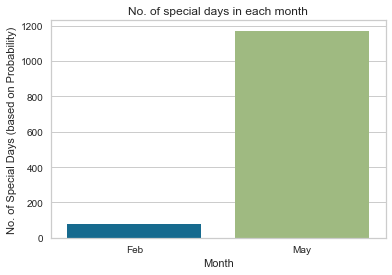

In [566]:
plt.figure(figsize = (6,4))
sns.barplot(x = data_nonzero_special_day_motnhly_counts.index, y = data_nonzero_special_day_motnhly_counts.values)
plt.xlabel('Month')
plt.ylabel('No. of Special Days (based on Probability)')
plt.title('No. of special days in each month')
plt.show()

In [567]:
# Observations
# Only May and Feb months have probabilty of having sapecial days, however no. of visitors is min. in Feb, which indiacates that 
# special days are not attracting visitors
# Let's try to explore in which months how many visitors actualy coverted to customers

In [568]:
data_monthly_rev_count = original_df.groupby('Month')['Revenue'].value_counts()

In [569]:
data_monthly_rev_count

Month  Revenue
Aug    False       357
       True         76
Dec    False      1511
       True        216
Feb    False       181
       True          3
Jul    False       366
       True         66
June   False       259
       True         29
Mar    False      1715
       True        192
May    False      2999
       True        365
Nov    False      2238
       True        760
Oct    False       434
       True        115
Sep    False       362
       True         86
Name: Revenue, dtype: int64

In [570]:
dict = {}
for i in range(len(data_monthly_rev_count)):
    month = data_monthly_rev_count.index[i][0]
    month_True_per = data_monthly_rev_count[(month,True)]*100 / (data_monthly_rev_count[(month,True)]+data_monthly_rev_count[(month,False)])
    dict[month] = round(month_True_per,2)
dict

{'Aug': 17.55,
 'Dec': 12.51,
 'Feb': 1.63,
 'Jul': 15.28,
 'June': 10.07,
 'Mar': 10.07,
 'May': 10.85,
 'Nov': 25.35,
 'Oct': 20.95,
 'Sep': 19.2}

In [571]:
monthly_conversion_per = pd.DataFrame.from_dict(dict,orient ='index')

In [572]:
monthly_conversion_per.rename(columns={0:'con_per'}, inplace=True)

In [573]:
monthly_conversion_per

,con_per
Aug,17.55
Dec,12.51
Feb,1.63
Jul,15.28
June,10.07
Mar,10.07
May,10.85
Nov,25.35
Oct,20.95
Sep,19.20


In [574]:
monthly_analysis = pd.merge(monthly_visitors_count_df, monthly_conversion_per, left_index=True, right_index=True)

In [575]:
monthly_analysis

,Monthly Visitors,con_per
May,3364,10.85
Nov,2998,25.35
Mar,1907,10.07
Dec,1727,12.51
Oct,549,20.95
Sep,448,19.20
Aug,433,17.55
Jul,432,15.28
June,288,10.07
Feb,184,1.63


<Figure size 1080x864 with 0 Axes>

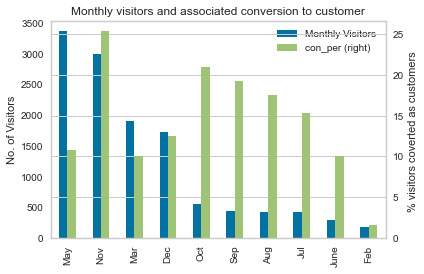

In [576]:
plt.figure(figsize = (15,12))
fig = monthly_analysis.plot(kind = 'bar', secondary_y = 'con_per')
plt.xlabel('Month')
ax1, ax2 = plt.gcf().get_axes()
ax1.set_ylabel('No. of Visitors')
ax2.set_ylabel('% visitors coverted as customers ')
plt.title('Monthly visitors and associated conversion to customer')

# x_labels = monthly_analysis['Monthly Visitors']
# fig.set_xticklabels(x_labels)
# fig.bar_label(fig.containers[0], label_type='edge')
fig.set
plt.show()

In [577]:
# Observations - 
# 1. From the graph, its clear that May and Feb months do not have good conversion ratio of visitors. Howerver these 
# two months only have the probability of having special days. We can conclude that special days need not to be drivers 
# for visitors conversion.
# 2. Nov month shows the maximum converion of vistors ~25.3%, so if any marketing strategy adopted in Nov month, recomendation
# is that same should be expanded for other months too.
# 3. May month seems to have hieghest visitors, however conversion is very poor ~11%. Strategies can be deployed for conversion
# of May month visitors. recomended to overview product details published on website in May month.


In [578]:
# Is there any relationship between specific month and specific region in terms of generating revenue?

In [579]:
original_df['Region'].unique()

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [580]:
data_rigional_rev_count = original_df.groupby('Region')['Revenue'].value_counts()

In [581]:
reg_dict = {}
for i in range(len(data_rigional_rev_count)):
    reg = data_rigional_rev_count.index[i][0]
    reg_True_per = data_rigional_rev_count[(reg,True)]*100 / (data_rigional_rev_count[(reg,True)]+data_rigional_rev_count[(reg,False)])
    reg_dict[reg] = round(reg_True_per,2)
reg_dict

{1: 16.13,
 2: 16.55,
 3: 14.52,
 4: 14.81,
 5: 16.35,
 6: 13.91,
 7: 15.64,
 8: 12.9,
 9: 16.83}

In [582]:
reg_conversion_per = pd.DataFrame.from_dict(reg_dict,orient ='index')

In [583]:
reg_conversion_per.rename(columns={0:'reg_con_per'}, inplace=True)

In [584]:
reg_conversion_per

,reg_con_per
1,16.13
2,16.55
3,14.52
4,14.81
5,16.35
6,13.91
7,15.64
8,12.90
9,16.83


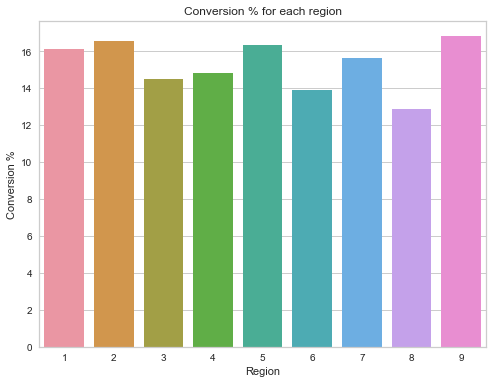

In [585]:
plt.figure(figsize = (8,6))
sns.barplot(x = reg_conversion_per.index, y = reg_conversion_per['reg_con_per'])
plt.xlabel('Region')
plt.ylabel('Conversion %')
plt.title('Conversion % for each region')
plt.show()

In [586]:
# Obervations - 
# 1. More or less, all the regions shows similar conversion %. In summary, region of visitors does not impact the conversion.

### Data preprocessing for developing the predictive models

In [587]:
pd.set_option('display.max_columns', None)
original_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [588]:
original_df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [589]:
original_df['Weekend'].unique()

array([False,  True])

In [590]:
original_df['Revenue'].unique()

array([False,  True])

In [591]:
original_df['PageValues'].unique().shape

(2704,)

In [592]:
df = pd.get_dummies(data = original_df, columns=['Month', 'VisitorType'], drop_first=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,1,0,0,0,0,0,0,0,0,1


In [593]:
df['Weekend'] = df['Weekend'].map({True:1, False:0})
df['Revenue'] = df['Revenue'].map({True:1, False:0})
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,1


In [594]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.140065,0.014923,0.035036,0.023358,0.154663,0.272830,0.243147,0.044526,0.036334,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.347068,0.121250,0.183880,0.151043,0.361598,0.445432,0.429000,0.206268,0.187128,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [595]:
col_name_list = list(df.columns[0:14])
col_name_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates in %',
 'ExitRates in %',
 'PageValues',
 'SpecialDay (probability)',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [596]:
#Skew = 3 * (Mean – Median) / Standard Deviation
col_with_ND = [] # Create empty list to capture columns having normal distribution
col_with_Non_ND = [] # Create empty list to capture columns having non-normal distribution (skewed data)

def skewness_calculation(col): # Define function to calculate skewness
    mean = df[col].mean()
    med = df[col].median()
    sd = df[col].std()
    skew = 3 * (mean - med) / sd
    if -0.5<skew<0.5:
        print(f'{col} --> fairly symmetrical -->', skew)
        col_with_ND.append(col)
    elif -1<skew<-0.5 or 0.5<skew<1:
        print(f'{col} --> moderatly skewed -->', skew)
        col_with_Non_ND.append(col)
    else:
        print(f'{col} --> highly skewed -->', skew)
        col_with_Non_ND.append(col)
for i in col_name_list:
    skewness_calculation(i)
print(col_with_ND, end = '\n\n')
print(col_with_Non_ND)

Administrative --> highly skewed --> 1.1877649652613569
Administrative_Duration --> highly skewed --> 1.2442411027260922
Informational --> highly skewed --> 1.1893854687522534
Informational_Duration --> moderatly skewed --> 0.7347617208862135
ProductRelated --> moderatly skewed --> 0.9262268177271417
ProductRelated_Duration --> moderatly skewed --> 0.9340317875112667
BounceRates in % --> highly skewed --> 1.1804231777881702
ExitRates in % --> highly skewed --> 1.1060290545293545
PageValues --> moderatly skewed --> 0.951494946033973
SpecialDay (probability) --> moderatly skewed --> 0.9264265265763322
OperatingSystems --> fairly symmetrical --> 0.4082182916562396
Browser --> moderatly skewed --> 0.6238304828589806
Region --> fairly symmetrical --> 0.18408314065150985
TrafficType --> highly skewed --> 1.5424840240476259
['OperatingSystems', 'Region']

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Boun

#### Detecting outliers, use IQR method for non-normal ditribution of data

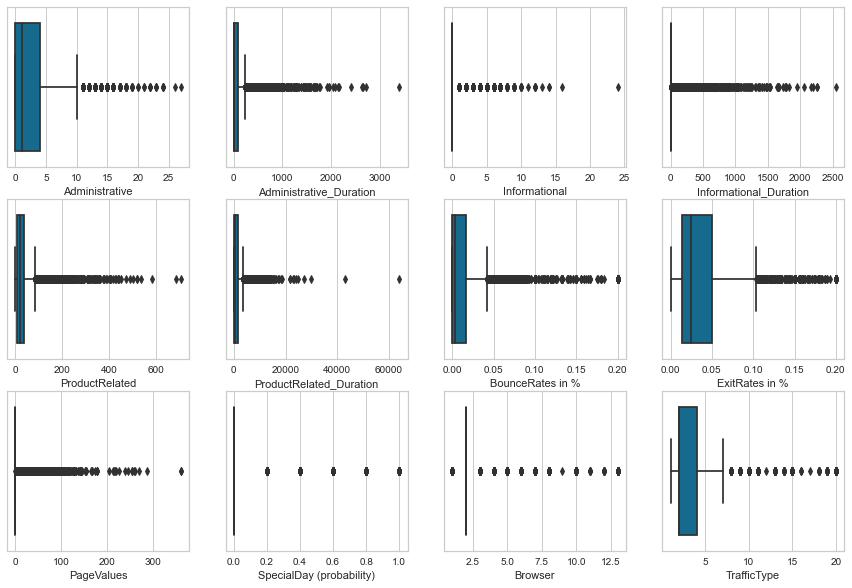

In [597]:
# Plot the boxplots for better visualization of outliers
fig = plt.figure(figsize = (15,10))
c = 1
for i in col_with_Non_ND:
    plt.subplot(3,4,c)
#     plt.title(i)
    sns.boxplot(df[i])
    c = c+1
plt.tight_layout
plt.show()

In [598]:
# Observation:
# 1. It is clear that most of the columns are highly skewed and has outliers. However most of this columns represents the 
# duration that customer has spent on the website. Which means that if higher duration spent, it indicates outliers but such
# visitors are important as they are showing interest in our website. So we will not treat these outliers, but we cannot use
# logistic regression for prediction.

#### Detecting outliers, use Z-Score method for normal ditribution of data

In [599]:
print(col_with_ND)

['OperatingSystems', 'Region']


In [600]:
# Observations:
# Both the columns represents the categorial feature and hence those will not have any outlier. For example, no regoin can be oullier.

#### Check of Multicollinearity

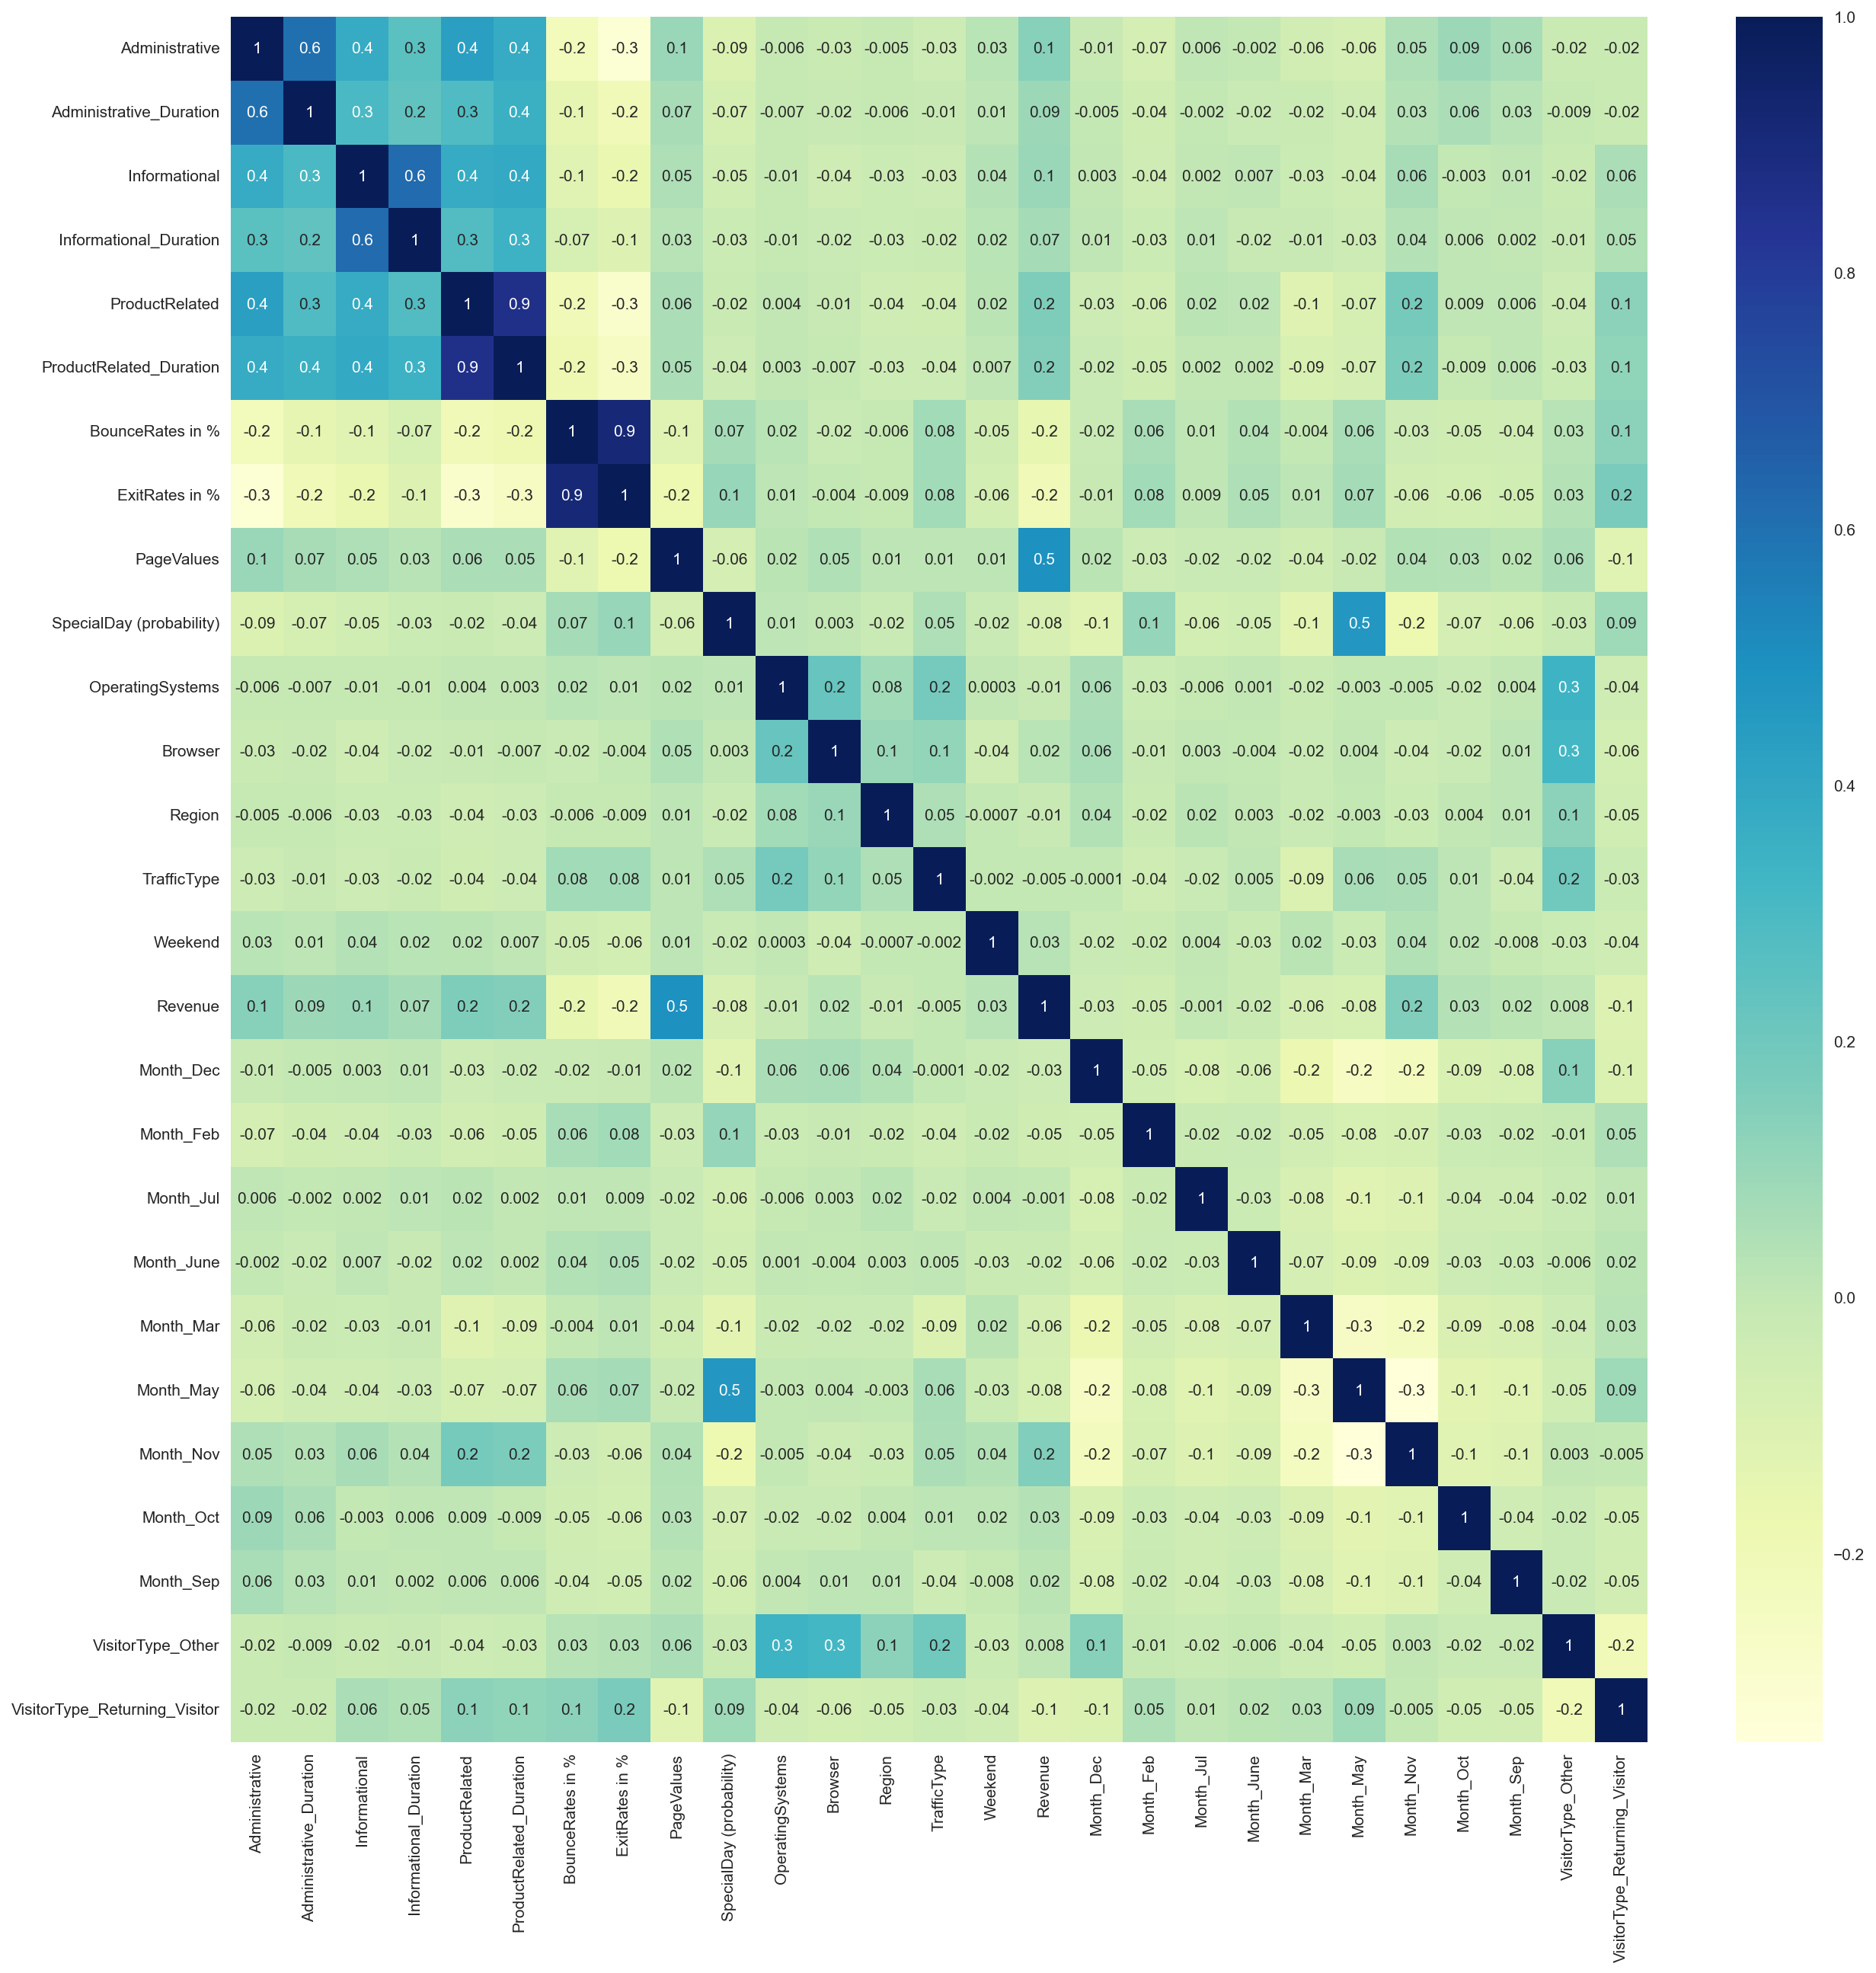

In [601]:
plt.figure(figsize = (20,20), dpi = 150)
heat_map_plot = sns.heatmap(df.corr(),fmt = '.1g',cmap='YlGnBu',annot=True)

In [602]:
# Obervation:
# Bounce rate and exits rates are highly positively correlated, And productRelated_duration and productRelated columns are also 
# highly positively correlated. We can use any one columns before building ML model. Apart from this, most of the columns 
# are non-correalted or observed to have weak correlation.

# pageValues has high correlation with revenue comapared to all other features

In [603]:
# Lets understand the pageValues details where visitors have pageValues greater than 0
df[df['PageValues']>0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
29,1,6.000000,1,0.00,45,1582.750000,0.043478,0.050821,54.179764,0.4,3,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
57,4,56.000000,2,120.00,36,998.741667,0.000000,0.014736,19.447079,0.2,2,2,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1
62,12,279.416667,0,0.00,42,1553.583333,0.009000,0.019667,38.308493,0.0,1,1,3,2,0,0,0,1,0,0,0,0,0,0,0,0,1
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,2,2,3,1,0,1,0,1,0,0,0,0,0,0,0,0,1
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,6,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2,305.125000,3,368.25,27,1121.250000,0.020000,0.042857,39.519807,0.0,3,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1
12312,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,2,5,1,2,1,1,0,0,0,0,0,0,1,0,0,0,1
12313,3,16.000000,3,86.00,15,2773.500000,0.000000,0.030000,78.811725,0.0,2,2,1,2,0,1,1,0,0,0,0,0,0,0,0,0,1
12319,0,0.000000,0,0.00,21,1128.583333,0.000000,0.013043,3.685401,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1


In [604]:
pageValues_page_dist = df.groupby('Informational')['PageValues'].sum()

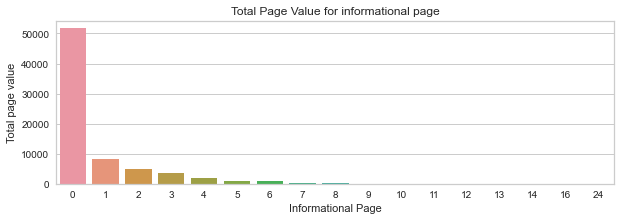

In [605]:
# Plot the PageValues for informational pages
plt.figure(figsize = (10,3))
sns.barplot(x =pageValues_page_dist.index, y = pageValues_page_dist.values)
plt.title('Total Page Value for informational page')
plt.xlabel('Informational Page')
plt.ylabel('Total page value')
plt.show()

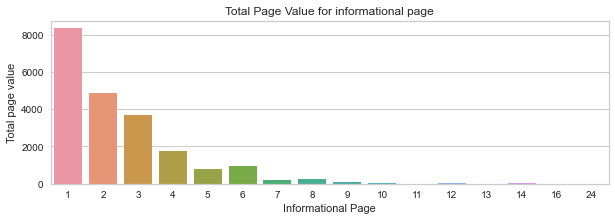

In [606]:
# Plot the PageValues for informational pages except 0 page as it seems to be home page
plt.figure(figsize = (10,3))
sns.barplot(x =pageValues_page_dist[1:].index, y = pageValues_page_dist[1:].values)
plt.title('Total Page Value for informational page')
plt.xlabel('Informational Page')
plt.ylabel('Total page value')
plt.show()

In [607]:
df = df.drop(columns=['ProductRelated','BounceRates in %'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,64.000000,0.10,0.0,0.0,2,2,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,4,1,9,3,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2.666667,0.14,0.0,0.0,3,2,2,4,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,627.500000,0.05,0.0,0.0,3,3,1,4,1,0,0,1,0,0,0,0,0,0,0,0,1


In [608]:
df.Revenue.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

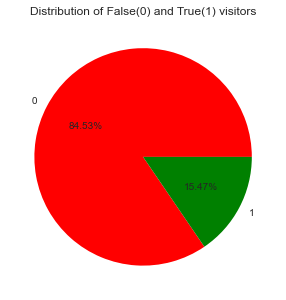

In [651]:
plt.figure(figsize = (5,5))
plt.pie(df.Revenue.value_counts(), labels=df.Revenue.value_counts().index, autopct="%.2f%%", colors=['red','Green'])
plt.title('Distribution of False(0) and True(1) visitors')
plt.show()

In [ ]:
# Clearly target variable is highly imabalanced

#### Build ML models

In [609]:
# First check the high level performace of various models through pycaret
from pycaret.classification import *

In [610]:
classification = setup(data = df, target = 'Revenue', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(12330, 25)"
4,Transformed data shape,"(12330, 25)"
5,Transformed train set shape,"(8631, 25)"
6,Transformed test set shape,"(3699, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [611]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9012,0.9217,0.5538,0.7434,0.6329,0.5774,0.5868,0.2630
gbc,Gradient Boosting Classifier,0.9005,0.9299,0.6077,0.7090,0.6533,0.5957,0.5988,0.2070
lightgbm,Light Gradient Boosting Machine,0.8992,0.9271,0.5935,0.7091,0.6454,0.5872,0.5909,0.4050
ada,Ada Boost Classifier,0.8906,0.9131,0.5575,0.6795,0.6118,0.5489,0.5530,0.2100
et,Extra Trees Classifier,0.8888,0.9094,0.4333,0.7455,0.5449,0.4869,0.5117,0.2850
lr,Logistic Regression,0.8843,0.8873,0.3824,0.7466,0.5044,0.4467,0.4795,1.4860
lda,Linear Discriminant Analysis,0.8796,0.9002,0.3322,0.7509,0.4590,0.4028,0.4461,0.1940
ridge,Ridge Classifier,0.8730,0.0000,0.2425,0.7950,0.3702,0.3215,0.3930,0.2500
knn,K Neighbors Classifier,0.8615,0.7658,0.3009,0.6049,0.4015,0.3332,0.3594,0.4590
dt,Decision Tree Classifier,0.8547,0.7291,0.5471,0.5304,0.5378,0.4518,0.4524,0.2060


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [612]:
# It seems that Randome Forest Classifier is providing highest accuracy amongst all other models. We can start exploration 
# with Random Forest

#### Build the random forest model

In [613]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report

In [614]:
x = df.drop(columns='Revenue')
y = df['Revenue']

In [615]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=10, stratify=y)

In [616]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(8631, 24)
(3699, 24)
(8631,)
(3699,)


In [617]:
rf = RandomForestClassifier(random_state=10)

In [618]:
param_dict = {'criterion':['gini', 'entropy'],
              'max_depth':[7,8,9,10,11,12],
              'class_weight' : [{0:1, 1:100},{0:1, 1:10}, {0:1, 1:5}],
              'max_features' : ["auto", "sqrt", "log2"]}

In [619]:
cv_rf = GridSearchCV(rf, cv = 10, param_grid = param_dict,verbose = 3, n_jobs = 3)

In [620]:
cv_rf.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             n_jobs=3,
     

In [621]:
print('Best parameters using Grid Search CV:', cv_rf.best_params_)

Best parameters using Grid Search CV: {'class_weight': {0: 1, 1: 5}, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto'}


In [630]:
rf.set_params(class_weight = {0: 1, 1: 5}, criterion = 'gini', max_depth = 12, max_features = 'auto')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

In [631]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 5},
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=10, verbose=0, warm_start=False)

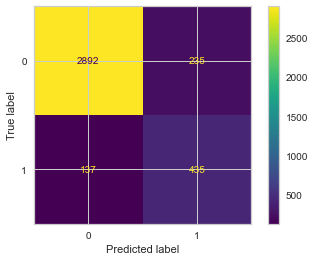

In [632]:
y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)
print(plot_confusion_matrix(rf,x_test,y_test ))

In [633]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      3127
           1       0.62      0.80      0.70       572

    accuracy                           0.89      3699
   macro avg       0.79      0.85      0.82      3699
weighted avg       0.91      0.89      0.90      3699



In [634]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7295
           1       0.75      0.92      0.83      1336

    accuracy                           0.94      8631
   macro avg       0.87      0.93      0.89      8631
weighted avg       0.95      0.94      0.94      8631



In [635]:
feature_importance_values = list(rf.feature_importances_)

In [636]:
feature_list = list(df.columns)
feature_list.remove('Revenue')
feature_list

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated_Duration',
 'ExitRates in %',
 'PageValues',
 'SpecialDay (probability)',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor']

In [637]:
feature_importance = pd.DataFrame()

In [638]:
feature_importance['Features'] = feature_list

In [639]:
feature_importance['Importance Values'] = feature_importance_values

In [640]:
feature_importance

,Features,Importance Values
0,Administrative,0.041358
1,Administrative_Duration,0.056557
2,Informational,0.016327
3,Informational_Duration,0.023036
4,ProductRelated_Duration,0.103515
5,ExitRates in %,0.103811
6,PageValues,0.463563
7,SpecialDay (probability),0.008850
8,OperatingSystems,0.015497
9,Browser,0.016109


In [641]:
feature_importance.sort_values(by = ['Importance Values'], inplace=True, ascending=False)

In [643]:
feature_importance

,Features,Importance Values
6,PageValues,0.463563
5,ExitRates in %,0.103811
4,ProductRelated_Duration,0.103515
1,Administrative_Duration,0.056557
0,Administrative,0.041358
19,Month_Nov,0.034436
11,TrafficType,0.025868
3,Informational_Duration,0.023036
10,Region,0.023004
23,VisitorType_Returning_Visitor,0.017685


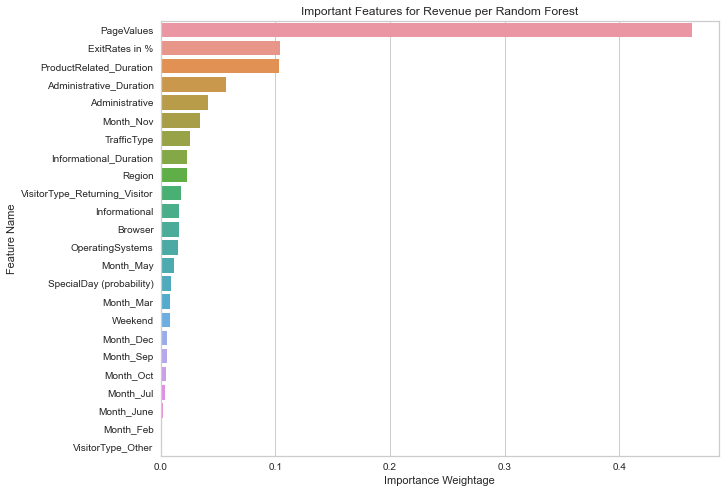

In [644]:
plt.figure(figsize = (10,8))
sns.barplot( y = feature_importance['Features'], x =feature_importance['Importance Values'])
plt.title('Important Features for Revenue per Random Forest')
plt.xlabel('Importance Weightage')
plt.ylabel('Feature Name')
plt.show()

In [524]:
df[df['PageValues']>0]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates in %,PageValues,SpecialDay (probability),OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
29,1,6.000000,1,0.00,1582.750000,0.050821,54.179764,0.4,3,2,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1
57,4,56.000000,2,120.00,998.741667,0.014736,19.447079,0.2,2,2,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1
62,12,279.416667,0,0.00,1553.583333,0.019667,38.308493,0.0,1,1,3,2,0,0,0,1,0,0,0,0,0,0,0,0,1
65,3,87.833333,0,0.00,798.333333,0.012644,22.916036,0.8,2,2,3,1,0,1,0,1,0,0,0,0,0,0,0,0,1
76,10,1005.666667,0,0.00,2111.341667,0.014493,11.439412,0.0,2,6,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2,305.125000,3,368.25,1121.250000,0.042857,39.519807,0.0,3,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1
12312,7,150.357143,1,9.00,11431.001240,0.021904,1.582473,0.0,2,5,1,2,1,1,0,0,0,0,0,0,1,0,0,0,1
12313,3,16.000000,3,86.00,2773.500000,0.030000,78.811725,0.0,2,2,1,2,0,1,1,0,0,0,0,0,0,0,0,0,1
12319,0,0.000000,0,0.00,1128.583333,0.013043,3.685401,0.0,2,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1
